# 수정사항

Dropout(0.5 -> 0.3) 정정

In [2]:
# 데이터 불러오기
import pandas as pd
train = pd.read_csv('../Data/orb_data/train.csv', index_col=0)
test = pd.read_csv('../Data/orb_data/test.csv', index_col=0)
sample_submission = pd.read_csv('../Data/orb_data/sample_submission.csv', index_col=0)

In [3]:
import numpy as np

x = train.copy() 

down_quantiles = x.quantile(0.0002)
up_quantiles = x.quantile(0.9998)

outliers_low = (x < down_quantiles)

outliers_high = (x > up_quantiles)

x[outliers_low] = np.nan
x = x.dropna()

x[outliers_high] = np.nan
x = x.dropna()

train = x

In [3]:
# Train 데이터의 타입을 Sample_submission에 대응하는 가변수 형태로 변환
column_number = {}
for i, column in enumerate(sample_submission.columns):
    column_number[column] = i
    
def to_number(x, dic):
    return dic[x]

train['type_num'] = train['type'].apply(lambda x : to_number(x, column_number))

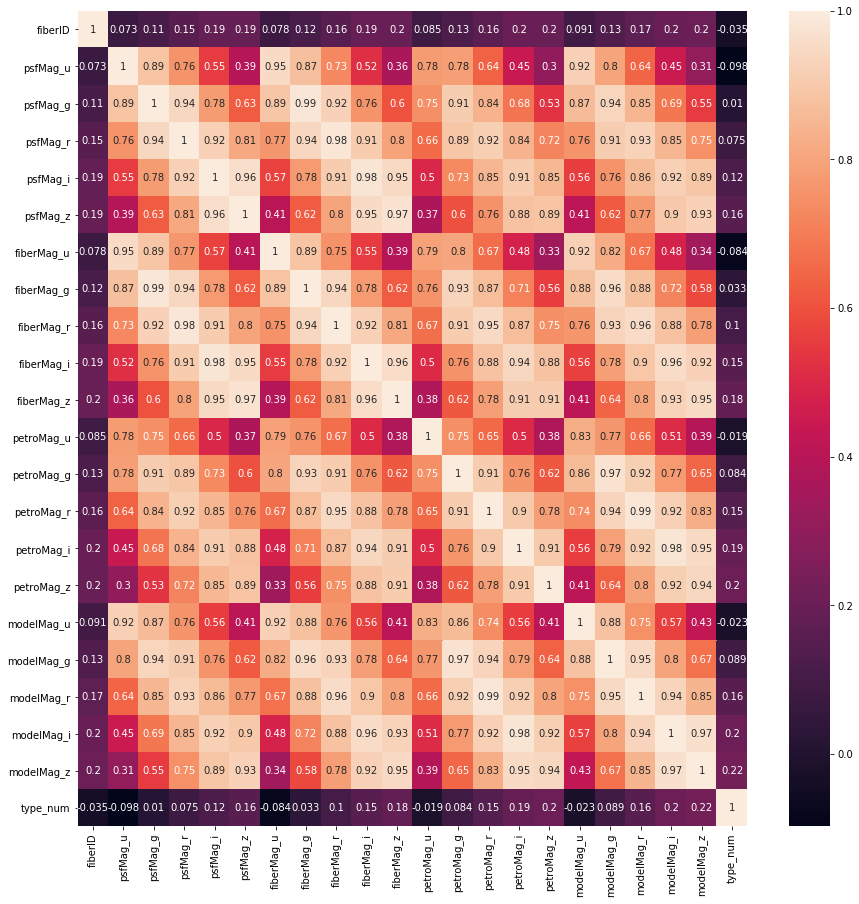

In [4]:
# 상관관계 파악을 위한 히트맵 그리기
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.heatmap(data=train.corr(), annot=True)
plt.show()

In [5]:
# 모델에 적용할 데이터 셋 준비 
train_x = train.drop(columns=['type', 'type_num'], axis=1)
train_y = train['type_num']
test_x = test # (10009, 20)

In [6]:
# FiberID 행 지우기
del train_x['fiberID']
del test_x['fiberID']

In [7]:
train_x.describe()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000,199326.000000
mean,20.979823,19.856575,19.283264,18.868866,18.609416,21.169836,20.088536,19.503972,19.086437,18.827770,20.706869,19.597136,19.006182,18.603221,18.391133,20.726958,19.527082,18.937278,18.518135,18.273653
std,2.067406,1.847352,1.692677,1.613026,1.671411,1.956920,1.831601,1.697707,1.620263,1.670219,2.422042,2.035232,1.902059,1.849755,1.995317,2.174131,1.947374,1.850234,1.786515,1.853845
min,7.900287,14.100453,12.794292,14.181015,12.997802,9.283217,13.268417,14.607630,14.564564,13.834731,-50.847000,-7.370070,-6.002004,6.260908,-7.276001,14.809196,13.671926,13.020510,12.603077,12.165089
25%,19.652008,18.701118,18.048531,17.747212,17.425149,19.941499,18.903997,18.260118,17.905040,17.607257,19.248508,18.114771,17.481697,17.052253,16.805815,19.265526,18.075517,17.423527,16.977867,16.705179
50%,20.868009,19.901808,19.452638,19.041419,18.608369,21.047364,20.068337,19.631813,19.189509,18.710445,20.365245,19.583750,19.182291,18.693264,18.172099,20.403206,19.543906,19.141585,18.640156,18.098112
75%,22.152519,21.143191,20.510942,20.070588,19.880933,22.333611,21.382953,20.772727,20.331307,20.132881,21.790701,20.998175,20.454079,20.016564,19.804433,21.984025,20.956657,20.405119,19.966302,19.816728
max,33.499325,28.844500,27.668891,27.168486,25.997083,31.516250,26.908828,26.269446,24.869431,24.792699,65.815133,43.328306,38.846081,35.969973,48.497613,30.413988,27.235230,26.584792,25.893193,25.326723


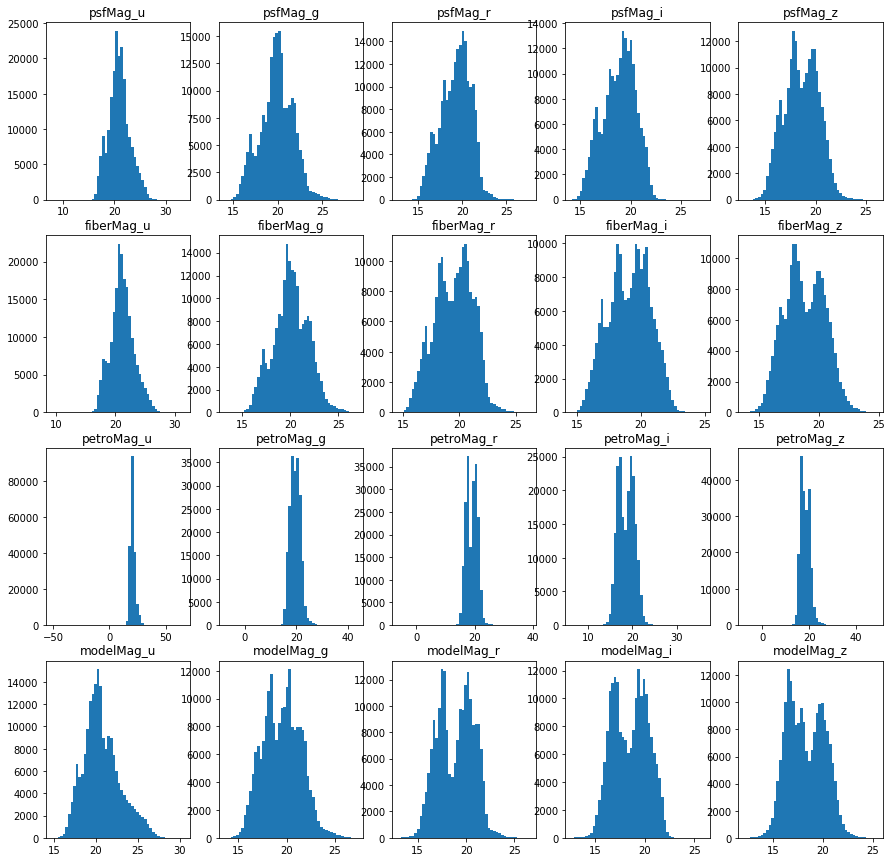

In [8]:
# 그래프 그리기
plt.figure(figsize=(15,15))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.hist(train_x.iloc[:,i], bins=50)
    plt.gca().set_title(train_x.columns[i])

In [9]:
test_x.describe()

,psfMag_u,psfMag_g,psfMag_r,psfMag_i,psfMag_z,fiberMag_u,fiberMag_g,fiberMag_r,fiberMag_i,fiberMag_z,petroMag_u,petroMag_g,petroMag_r,petroMag_i,petroMag_z,modelMag_u,modelMag_g,modelMag_r,modelMag_i,modelMag_z
count,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000,10009.000000
mean,20.987400,19.878440,19.280218,18.873165,18.618385,21.184506,20.091376,19.497732,19.083329,18.826624,20.715429,19.462021,18.995001,18.616519,18.411996,20.739001,19.534844,18.935095,18.522308,18.281069
std,2.111703,2.573890,1.709344,1.720713,1.702236,1.990940,1.865064,1.710070,1.633953,1.711790,2.807434,13.971203,1.979225,1.970463,2.373022,2.187025,1.957506,1.856617,1.796820,1.867582
min,-7.248195,-42.663871,9.134712,-22.522266,13.349827,9.390439,8.188752,12.288183,12.688984,-8.455932,-98.181975,-1348.068776,-23.908952,-8.356654,-64.917293,12.419765,13.617577,13.382832,12.955113,12.395695
25%,19.655525,18.671025,18.037847,17.742016,17.424701,19.940430,18.892043,18.253627,17.905253,17.610776,19.249432,18.104265,17.475078,17.043615,16.805557,19.268471,18.064625,17.424393,16.971911,16.715685
50%,20.854404,19.910333,19.444925,19.033283,18.594713,21.040735,20.071658,19.627904,19.180605,18.699819,20.371014,19.582955,19.197068,18.684269,18.171966,20.412702,19.541261,19.155839,18.635195,18.095883
75%,22.160801,21.150040,20.489912,20.083814,19.878652,22.339213,21.402558,20.756306,20.331848,20.119736,21.803705,21.025719,20.428279,20.015701,19.815916,21.992969,20.981396,20.389215,19.970657,19.823902
max,37.681143,182.654452,31.883768,47.227391,34.946057,41.169991,47.160580,29.266687,31.146742,26.478564,65.392087,106.962571,41.850633,52.221528,74.747394,32.641240,28.814977,27.579664,26.471555,24.461973


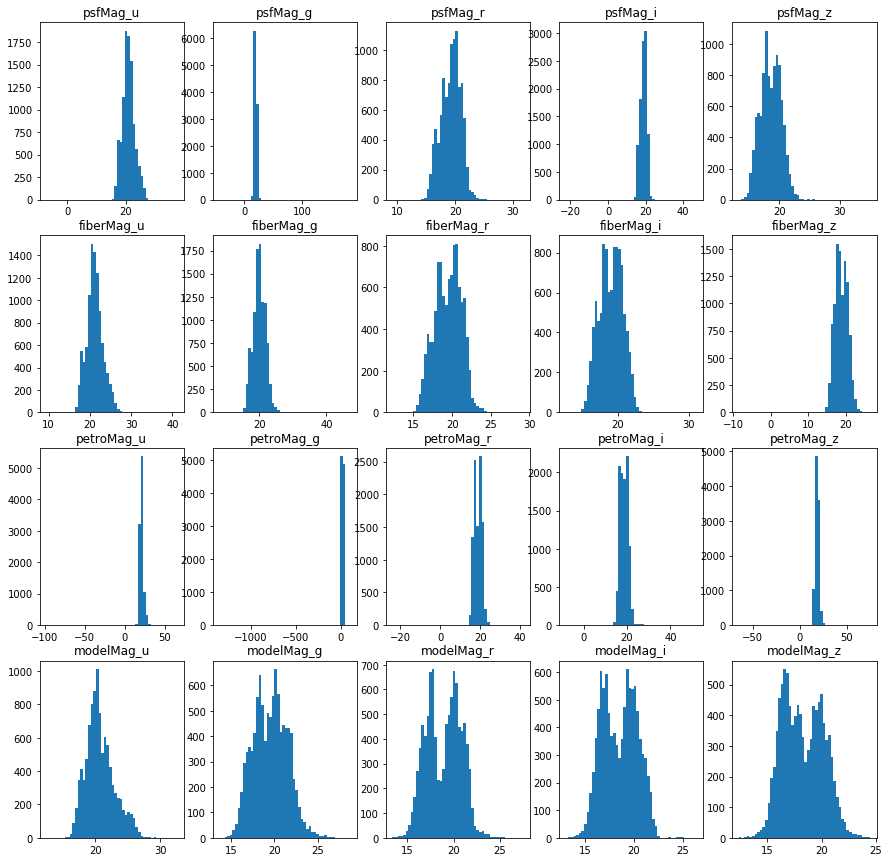

In [10]:
# 그래프 그리기
plt.figure(figsize=(15,15))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.hist(test_x.iloc[:,i], bins=50)
    plt.gca().set_title(test_x.columns[i])

In [11]:
# 훈련 데이터와 테스트 데이터로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2,  shuffle=True, random_state=0)

# One-Hot Encoding
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [12]:
# 데이터 스케일
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
test_x = scaler.transform(test_x)

In [13]:
# gelu activation function -  Gaussian Error Linear Units (GELUs)
# https://arxiv.org/abs/1606.08415

import numpy as np
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
import tensorflow as tf
class Gelu(Activation):
    def __init__(self, activation, **kwargs):
        super(Gelu, self).__init__(activation, **kwargs)
        self.__name__='gelu'
        
def gelu(x):
    return 0.5 * x * (1 + tf.tanh(tf.sqrt(2 / np.pi) * (x + 0.044715 * tf.pow(x, 3))))

get_custom_objects().update({'gelu': Gelu(gelu)})

In [14]:
# 모델 구성
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation

model = Sequential()
model.add(Dense(128, input_shape=(20,)))
# model.add(BatchNormalization())
model.add(Activation('gelu'))
model.add(Dropout(0.3))
model.add(Dense(128))
# model.add(BatchNormalization())
model.add(Activation('gelu'))
model.add(Dropout(0.3))
model.add(Dense(128))
# model.add(BatchNormalization())
model.add(Activation('gelu'))
model.add(Dropout(0.3))
model.add(Dense(19, activation='softmax'))

In [15]:
# 모델 요약
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2688      
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [16]:
# 조기 종료
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=100)

In [17]:
# 컴파일
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
# Adam optimizer default: keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [18]:
# 훈련
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10000, batch_size=256, callbacks=[early_stopping]) # epochs number changeable

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 127568 samples, validate on 31892 samples
Epoch 1/10000
127568/127568 [==============================] - 8s 59us/step - loss: 0.9133 - accuracy: 0.7224 - val_loss: 0.5726 - val_accuracy: 0.8207
Epoch 2/10000
127568/127568 [==============================] - 7s 56us/step - loss: 0.6081 - accuracy: 0.8033 - val_loss: 0.5147 - val_accuracy: 0.8301
Epoch 3/10000
127568/127568 [==============================] - 7s 56us/step - loss: 0.5547 - accuracy: 0.8168 - val_loss: 0.4898 - val_accuracy: 0.8366
Epoch 4/10000
127568/127568 [==============================] - 7s 56us/step - loss: 0.5338 - accuracy: 0.8217 - val_loss: 0.4714 - val_accuracy: 0.8411
Epoch 5/10000
127568/127568 [==============================] - 7s 56us/step - loss: 0.5155 - accuracy: 0.8272 - val_loss: 0.4637 - val_accuracy: 0.8417
Epoch 6/10000
127568/127568 [==============================] - 7s 56us/step - loss: 0.5039 - a

127568/127568 [==============================] - 7s 55us/step - loss: 0.4253 - accuracy: 0.8538 - val_loss: 0.3886 - val_accuracy: 0.8661
Epoch 51/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4234 - accuracy: 0.8542 - val_loss: 0.3919 - val_accuracy: 0.8639
Epoch 52/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4218 - accuracy: 0.8547 - val_loss: 0.3888 - val_accuracy: 0.8650
Epoch 53/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4241 - accuracy: 0.8543 - val_loss: 0.3897 - val_accuracy: 0.8628
Epoch 54/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4216 - accuracy: 0.8545 - val_loss: 0.3869 - val_accuracy: 0.8655
Epoch 55/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4218 - accuracy: 0.8548 - val_loss: 0.3924 - val_accuracy: 0.8636
Epoch 56/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4222 - acc

127568/127568 [==============================] - 7s 55us/step - loss: 0.4117 - accuracy: 0.8571 - val_loss: 0.3802 - val_accuracy: 0.8675
Epoch 104/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4108 - accuracy: 0.8583 - val_loss: 0.3858 - val_accuracy: 0.8659
Epoch 105/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4102 - accuracy: 0.8581 - val_loss: 0.3821 - val_accuracy: 0.8672
Epoch 106/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4089 - accuracy: 0.8585 - val_loss: 0.3812 - val_accuracy: 0.8676
Epoch 107/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4107 - accuracy: 0.8575 - val_loss: 0.3791 - val_accuracy: 0.8684
Epoch 108/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4100 - accuracy: 0.8580 - val_loss: 0.3833 - val_accuracy: 0.8668
Epoch 109/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4094

127568/127568 [==============================] - 7s 55us/step - loss: 0.4045 - accuracy: 0.8600 - val_loss: 0.3787 - val_accuracy: 0.8696
Epoch 157/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4029 - accuracy: 0.8600 - val_loss: 0.3766 - val_accuracy: 0.8674
Epoch 158/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4055 - accuracy: 0.8597 - val_loss: 0.3770 - val_accuracy: 0.8678
Epoch 159/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4035 - accuracy: 0.8592 - val_loss: 0.3764 - val_accuracy: 0.8684
Epoch 160/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4046 - accuracy: 0.8595 - val_loss: 0.3743 - val_accuracy: 0.8694
Epoch 161/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4043 - accuracy: 0.8599 - val_loss: 0.3751 - val_accuracy: 0.8696
Epoch 162/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4025

127568/127568 [==============================] - 7s 55us/step - loss: 0.4015 - accuracy: 0.8603 - val_loss: 0.3753 - val_accuracy: 0.8697
Epoch 210/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4014 - accuracy: 0.8614 - val_loss: 0.3759 - val_accuracy: 0.8686
Epoch 211/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4006 - accuracy: 0.8604 - val_loss: 0.3723 - val_accuracy: 0.8699
Epoch 212/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4014 - accuracy: 0.8608 - val_loss: 0.3744 - val_accuracy: 0.8700
Epoch 213/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4008 - accuracy: 0.8613 - val_loss: 0.3739 - val_accuracy: 0.8693
Epoch 214/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.3998 - accuracy: 0.8611 - val_loss: 0.3723 - val_accuracy: 0.8701
Epoch 215/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.4009

127568/127568 [==============================] - 7s 55us/step - loss: 0.3984 - accuracy: 0.8611 - val_loss: 0.3696 - val_accuracy: 0.8713
Epoch 263/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.3992 - accuracy: 0.8618 - val_loss: 0.3767 - val_accuracy: 0.8677
Epoch 264/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.3976 - accuracy: 0.8620 - val_loss: 0.3761 - val_accuracy: 0.8693
Epoch 265/10000
127568/127568 [==============================] - 7s 54us/step - loss: 0.3989 - accuracy: 0.8616 - val_loss: 0.3784 - val_accuracy: 0.8668
Epoch 266/10000
127568/127568 [==============================] - 7s 54us/step - loss: 0.3979 - accuracy: 0.8623 - val_loss: 0.3714 - val_accuracy: 0.8711
Epoch 267/10000
127568/127568 [==============================] - 7s 54us/step - loss: 0.3963 - accuracy: 0.8623 - val_loss: 0.3738 - val_accuracy: 0.8704
Epoch 268/10000
127568/127568 [==============================] - 7s 54us/step - loss: 0.3984

127568/127568 [==============================] - 7s 54us/step - loss: 0.3980 - accuracy: 0.8622 - val_loss: 0.3724 - val_accuracy: 0.8706
Epoch 316/10000
127568/127568 [==============================] - 7s 54us/step - loss: 0.3974 - accuracy: 0.8617 - val_loss: 0.3689 - val_accuracy: 0.8699
Epoch 317/10000
127568/127568 [==============================] - 7s 54us/step - loss: 0.3951 - accuracy: 0.8625 - val_loss: 0.3724 - val_accuracy: 0.8699
Epoch 318/10000
127568/127568 [==============================] - 7s 54us/step - loss: 0.3965 - accuracy: 0.8627 - val_loss: 0.3687 - val_accuracy: 0.8709
Epoch 319/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.3945 - accuracy: 0.8631 - val_loss: 0.3708 - val_accuracy: 0.8706
Epoch 320/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.3967 - accuracy: 0.8622 - val_loss: 0.3683 - val_accuracy: 0.8702
Epoch 321/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.3962

127568/127568 [==============================] - 7s 54us/step - loss: 0.3933 - accuracy: 0.8634 - val_loss: 0.3705 - val_accuracy: 0.8706
Epoch 369/10000
127568/127568 [==============================] - 7s 54us/step - loss: 0.3939 - accuracy: 0.8636 - val_loss: 0.3737 - val_accuracy: 0.8694
Epoch 370/10000
127568/127568 [==============================] - 7s 54us/step - loss: 0.3970 - accuracy: 0.8629 - val_loss: 0.3760 - val_accuracy: 0.8693
Epoch 371/10000
127568/127568 [==============================] - 7s 54us/step - loss: 0.3953 - accuracy: 0.8626 - val_loss: 0.3735 - val_accuracy: 0.8705
Epoch 372/10000
127568/127568 [==============================] - 7s 54us/step - loss: 0.3928 - accuracy: 0.8636 - val_loss: 0.3732 - val_accuracy: 0.8693
Epoch 373/10000
127568/127568 [==============================] - 7s 54us/step - loss: 0.3938 - accuracy: 0.8625 - val_loss: 0.3724 - val_accuracy: 0.8709
Epoch 374/10000
127568/127568 [==============================] - 7s 54us/step - loss: 0.3943

127568/127568 [==============================] - 7s 55us/step - loss: 0.3934 - accuracy: 0.8633 - val_loss: 0.3700 - val_accuracy: 0.8695
Epoch 422/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.3935 - accuracy: 0.8634 - val_loss: 0.3705 - val_accuracy: 0.8705
Epoch 423/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.3953 - accuracy: 0.8628 - val_loss: 0.3716 - val_accuracy: 0.8704
Epoch 424/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.3923 - accuracy: 0.8631 - val_loss: 0.3711 - val_accuracy: 0.8716
Epoch 425/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.3917 - accuracy: 0.8635 - val_loss: 0.3670 - val_accuracy: 0.8712
Epoch 426/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.3934 - accuracy: 0.8624 - val_loss: 0.3724 - val_accuracy: 0.8708
Epoch 427/10000
127568/127568 [==============================] - 7s 55us/step - loss: 0.3930

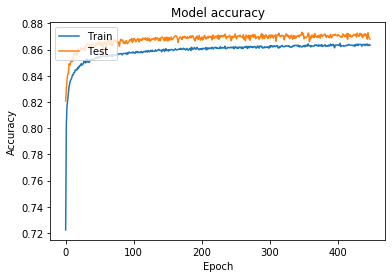

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

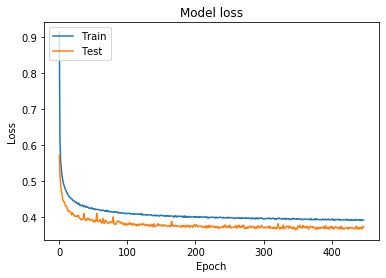

In [20]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [21]:
# 평가예측
loss, accuracy = model.evaluate(X_test, y_test, batch_size=256)
print('loss: ', loss)
print('accuracy: ', accuracy)

39866/39866 [==============================] - 2s 39us/step
loss:  0.37464971460844193
accuracy:  0.8679074645042419


In [22]:
# Evaluating in optimal parameter
y_pred = model.predict(test_x)
print(y_pred)

[[8.1658791e-06 3.0062128e-07 1.9870130e-03 ... 1.1554926e-08
  6.6912995e-05 2.3076850e-06]
 [5.2570266e-04 3.8168356e-08 3.0920098e-09 ... 6.6272882e-10
  5.4134194e-05 7.2388840e-04]
 [1.9170954e-09 7.0861672e-12 2.0760066e-18 ... 1.0531105e-15
  1.2334859e-08 2.8881936e-10]
 ...
 [2.3018288e-04 1.2777869e-04 7.1655668e-11 ... 4.6151548e-08
  1.7832053e-05 4.4464320e-02]
 [5.9162181e-10 3.7457600e-17 7.1204259e-14 ... 7.2711412e-12
  1.8851400e-09 1.8783416e-04]
 [2.1910340e-05 3.0305390e-08 1.4170114e-11 ... 3.5332703e-10
  2.7779256e-08 4.2114314e-07]]


In [24]:
# 제출 파일 생성
# submission = pd.DataFrame(data=y_pred, columns=sample_submission.columns, index=sample_submission.index)
# submission.to_csv('submission.csv', index=True)

제출 결과: 0.40173

# 결과 분석 

loss와 val_loss의 값이 Underfitting이 나기 때문에 Dropout의 비율을 줄여 Underfitting을 정정하겠습니다. (0.3 -> 0.2)